<a href="https://colab.research.google.com/github/ChadiDridi/A-sample-of-CPA-analysis-and-K-Means-/blob/main/K_means_%2B_PCA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importation des bibliotheques 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
%matplotlib inline
import numpy as np 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


I- Importation du Data et visulatisation 


In [ ]:
#On va utiliser une dataset tunisienne avec l exemple classique du "House Pricing" le cas d'école afin d'appliquer la méthode K-Means
# L'importation de notre DataSet
from google.colab import files
url='https://drive.google.com/file/d/1X6TgPKOX7f6G2JQTDXB3Yhzu3HHnigxR/view?usp=share_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()




,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


Etude du data avant de faire analyse : 


In [ ]:
print(df.isnull().sum())

category          0
room_count        0
bathroom_count    0
size              0
type              0
price             0
city              0
region            0
log_price         0
dtype: int64


In [ ]:
df.info

<bound method DataFrame.info of                     category  room_count  bathroom_count   size      type  \
0         Terrains et Fermes        -1.0            -1.0   -1.0  À Vendre   
1         Terrains et Fermes        -1.0            -1.0   -1.0  À Vendre   
2               Appartements         2.0             1.0   80.0   À Louer   
3      Locations de vacances         1.0             1.0   90.0   À Louer   
4               Appartements         2.0             2.0  113.0  À Vendre   
...                      ...         ...             ...    ...       ...   
12743     Terrains et Fermes        -1.0            -1.0   -1.0  À Vendre   
12744           Appartements         1.0             1.0  100.0   À Louer   
12745      Maisons et Villas         3.0             1.0  760.0  À Vendre   
12746      Maisons et Villas         3.0             1.0  190.0  À Vendre   
12747      Maisons et Villas         2.0             1.0   70.0   À Louer   

           price    city         region  lo

In [ ]:
df.columns

Index(['category', 'room_count', 'bathroom_count', 'size', 'type', 'price',
       'city', 'region', 'log_price'],
      dtype='object')

In [ ]:
df.describe()

,room_count,bathroom_count,size,price,log_price
count,12748.000000,12748.000000,12748.000000,1.274800e+04,12748.000000
mean,1.759649,0.759884,130.896219,1.601575e+07,4.374245
std,2.171468,1.264812,184.074990,1.016644e+09,1.389788
min,-1.000000,-1.000000,-1.000000,1.000000e+01,1.000000
25%,-1.000000,-1.000000,-1.000000,8.500000e+02,2.929419
50%,2.000000,1.000000,95.000000,8.975000e+04,4.953033
75%,3.000000,1.000000,150.000000,2.600000e+05,5.414973
max,20.000000,10.000000,2000.000000,1.000000e+11,11.000000


In [ ]:
df=df[df['type']=='À Louer'] #on travaille seulement sur le data des maisons à louer (filtration des lignes)

In [ ]:
df=df.drop(['type','city','region','category'],axis=1)
#pour appliquer le PCA et afin de ne pas utiliser le codage OneHotEncoding pour le data non numerique , on elimine les 4 colonnes non numeriques 
#Cette pratique est fortement contre le principe du data science et Machine Learning mais ce projet est un cas d'étude 

In [ ]:
df

,room_count,bathroom_count,size,price,log_price
2,2.0,1.0,80.0,380.0,2.579784
3,1.0,1.0,90.0,70.0,1.845098
5,1.0,1.0,70.0,80.0,1.903090
6,2.0,1.0,100.0,670.0,2.826075
7,2.0,1.0,20.0,650.0,2.812913
...,...,...,...,...,...
12735,2.0,1.0,70.0,140.0,2.146128
12737,1.0,1.0,300.0,1800.0,3.255273
12738,1.0,1.0,60.0,90.0,1.954243
12744,1.0,1.0,100.0,600.0,2.778151


In [ ]:
df.shape
#on a maintenant 5 colonnes pour faire l etude de reduction et PCA (Principale Componenent analysis) 

(4990, 5)

Maintenant on va faire une CPA pour faire le Kmeans aprés

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)  #c est la dim de l espace  de projection ici = 3 
pca.fit(df)
pca_samples = pca.transform(df)

In [ ]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-44684.897712,-64.513552,-0.241186
1,-44994.897694,-54.517098,-1.310146
2,-44984.897731,-74.516879,-1.231525
3,-44394.897676,-44.513937,-0.292531
4,-44414.897821,-124.513256,-0.000020


In [ ]:
print(pca.components_) 


[[-9.35251165e-09 -6.68076927e-09  1.81464951e-06  1.00000000e+00
   1.50039633e-07]
 [ 3.11036397e-03  2.29787612e-03  9.99991747e-01 -1.81477703e-06
   1.24589687e-03]
 [ 9.66390727e-01  2.40915765e-01 -3.67113223e-03  3.86015839e-09
   8.96386041e-02]]


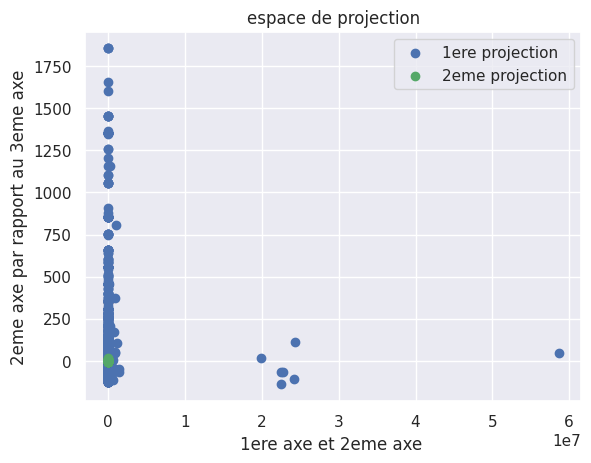

In [ ]:
plt.scatter(ps[0],ps[1], label="1ere projection", color='b')
plt.scatter(ps[1],ps[2], label="2eme projection", color='g')
plt.plot()

plt.xlabel("1ere axe et 2eme axe ")
plt.ylabel("2eme axe par rapport au 3eme axe")
plt.title("espace de projection")
plt.legend()
plt.show()

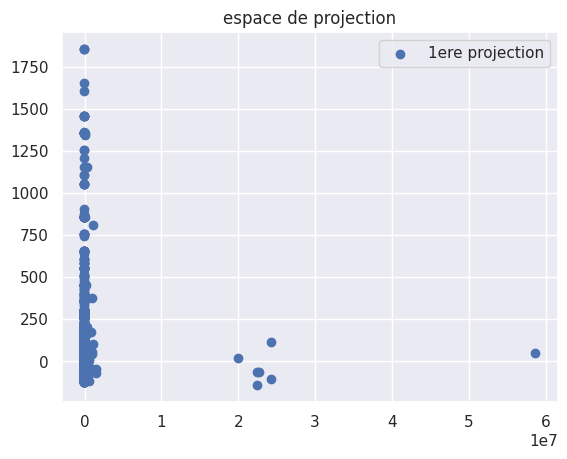

In [ ]:
#pour une projection de dim = 2 : 
plt.scatter(ps[0],ps[1], label="1ere projection", color='b')

plt.plot()
plt.title("espace de projection")
plt.legend()
plt.show()

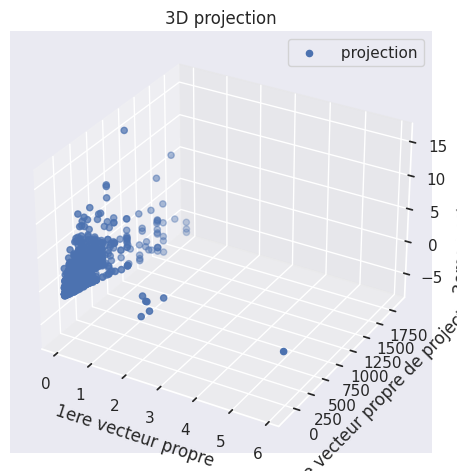

In [ ]:
#espace de projection dim = 3 en 3D: 
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(ps[0],ps[1],ps[2], label=" projection", color='b')


ax.set_xlabel('1ere vecteur propre')
ax.set_ylabel('2eme vecteur propre de projection')
ax.set_zlabel('3eme vecteur propre')
plt.title("3D projection")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print(pca.explained_variance_)

[1.31586332e+12 2.71079733e+04 1.44392629e+00]


In [ ]:
pca

PCA(n_components=3)

In [ ]:
X1 = ps[[0 ,1,2]].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_) #l algorithme c est entrainé 15 fois a chaque vois une novelle valeure avec le nombre de clusters = n 

In [ ]:
algorithm.fit(X1)
inertia

[6564842252546076.0,
 1137256376928698.5,
 29767993879182.277,
 16828459835873.014,
 7846085368623.986,
 4246911737909.323,
 1454113795061.7751,
 772771047488.2133,
 394037090878.91907,
 313910861407.34406,
 243799794845.25256,
 185263714148.02078,
 126201484967.21051,
 96019839598.2455]

pour K = 2



In [ ]:
from sklearn.cluster import KMeans
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
model = algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


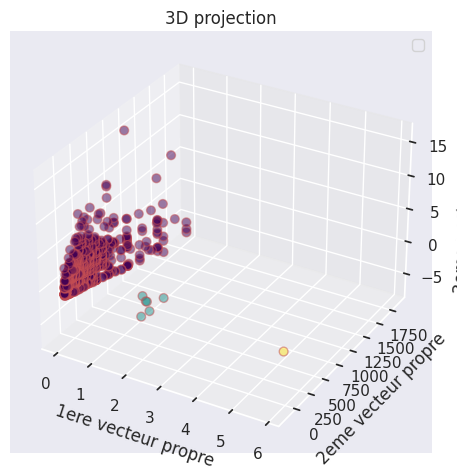

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(ps[0],ps[1],ps[2],c=algorithm.labels_, cmap='viridis',edgecolor='r', s=40, alpha = 0.5)
centroids_x = centroids1[:,0]
centroids_y = centroids1[:,1]
ax.set_xlabel('1ere vecteur propre')
ax.set_ylabel('2eme vecteur propre')
ax.set_zlabel('3eme vecteur propre')
plt.title("3D projection")
plt.legend()
plt.tight_layout()
plt.show()

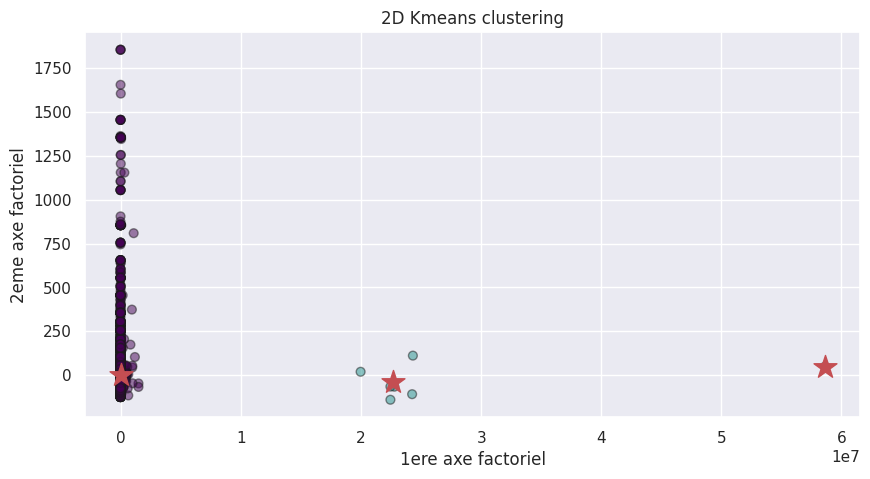

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=3, random_state=42)
kmeans.fit(ps)

# plot clusters and centroids
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(ps[0],ps[1], c=kmeans.labels_, cmap='viridis',
           edgecolor='k', s=40, alpha = 0.5)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 300, c = 'r', marker='*', label = 'Centroid')
ax.set_title("2D Kmeans clustering")
ax.set_xlabel("1ere axe factoriel")
ax.set_ylabel("2eme axe factoriel")   
plt.show()

Pour K=4 :

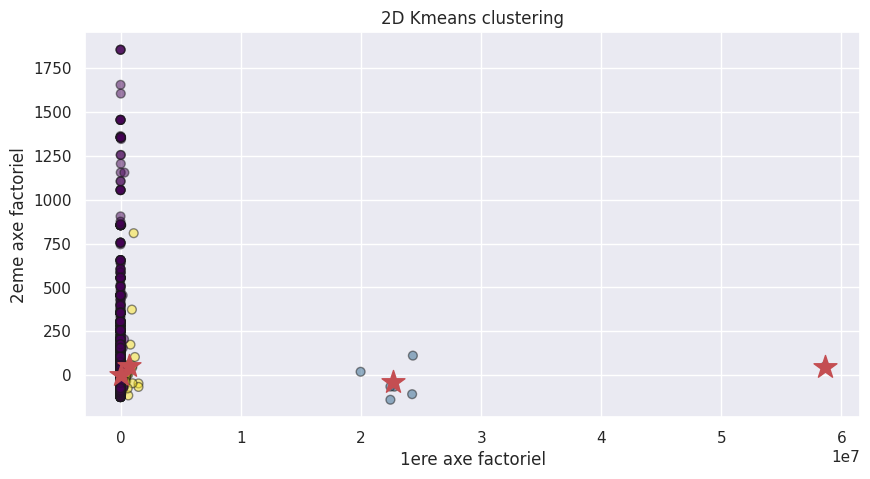

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=4, random_state=42)
kmeans.fit(ps)

# plot clusters and centroids
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(ps[0],ps[1], c=kmeans.labels_, cmap='viridis',
           edgecolor='k', s=40, alpha = 0.5)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 300, c = 'r', marker='*', label = 'Centroid')
ax.set_title("2D Kmeans clustering")
ax.set_xlabel("1ere axe factoriel")
ax.set_ylabel("2eme axe factoriel")   
plt.show()

Pour K=5

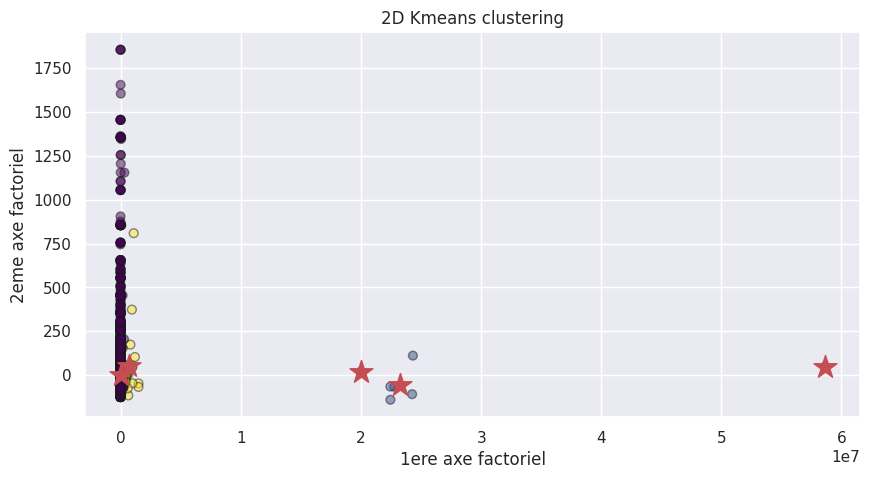

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=5, random_state=42)
kmeans.fit(ps)

# plot clusters and centroids
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(ps[0],ps[1], c=kmeans.labels_, cmap='viridis',
           edgecolor='k', s=40, alpha = 0.5)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 300, c = 'r', marker='*', label = 'Centroid')
ax.set_title("2D Kmeans clustering")
ax.set_xlabel("1ere axe factoriel")
ax.set_ylabel("2eme axe factoriel")   
plt.show()